In [33]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="ticks", palette="pastel")
sns.set_style("white")
sns.set_context("poster")

In [39]:
limits = {
    "Wheel Radius": (0.5, 1.5),
    "Chassis Length": (1, 4),
    "Suspension Frequency": (1, 8),
    "Suspension Damping": (0.3, 0.9),
    "Sensor Limit": (1, 10),
    "Speed Max": (0, 10),
    "Speed Slope": (0, 10),
    "Speed Intercept": (-20, 20),
}

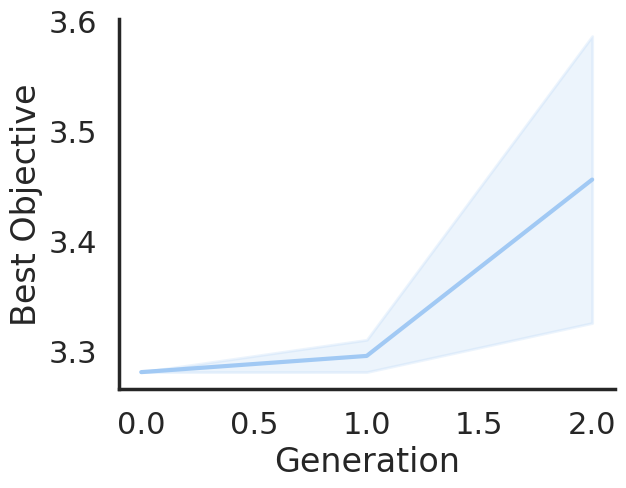

In [34]:
files = Path(".").glob("*-generations.csv")

partial_dfs = []

for f in files:
    trial = f.stem.split("trial")[1].split("-")[0]
    df_partial = pd.read_csv(f)
    df_partial["Trial"] = trial

    partial_dfs.append(df_partial)

df = pd.concat(partial_dfs, ignore_index=True)
sns_plot = sns.lineplot(x="Generation", y="Best Objective", data=df)
# sns_plot.figure.savefig("generations.png")  # type: ignore
# sns.despine(offset=10, trim=True)
sns.despine()

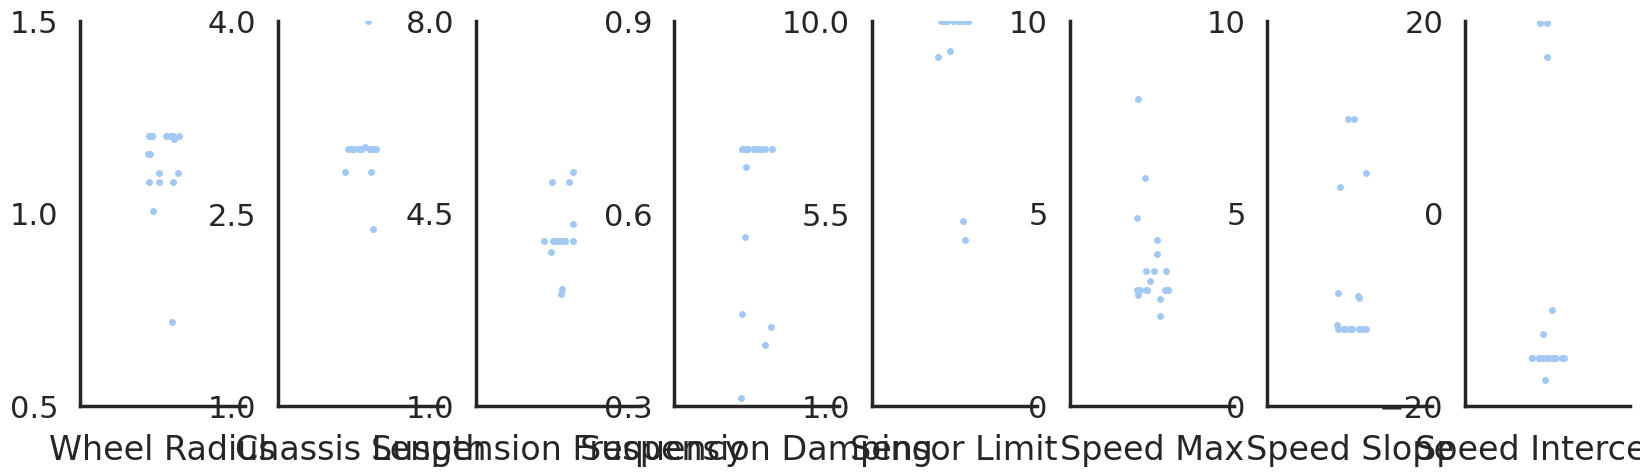

In [42]:
files = Path(".").glob("*-parameters.csv")

partial_dfs = []

for f in files:
    trial = f.stem.split("trial")[1].split("-")[0]
    df_partial = pd.read_csv(f)
    df_partial["Trial"] = trial

    partial_dfs.append(df_partial)

df = pd.concat(partial_dfs, ignore_index=True)
df.columns = [n.replace("_", " ").title() for n in df.columns]

fig, axes = plt.subplots(1, 8, figsize=(20, 5))

for ax, col in zip(axes, df.columns[1:]):  # type: ignore
    lo, hi = limits[col]
    sns.stripplot(y=col, data=df, ax=ax)
    ax.set_ylabel("")
    ax.set_xlabel(col)
    ax.set_ylim(lo, hi)
    ax.set_yticks([lo, (lo + hi) / 2, hi])

sns.despine()